<a href="https://colab.research.google.com/github/AsmaBenHmidene/food-sales-predictions/blob/main/Explaining_Models_with_Shap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import joblib
loaded = joblib.load('/content/drive/MyDrive/Coding Dojo/Data visualization/week1/best-models.joblib')
loaded.keys()

dict_keys(['X_train', 'y_train', 'X_test', 'y_test', 'preprocessor', 'LinearRegression', 'RandomForest'])

In [ ]:
## Our standard imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Models & evaluation metrics
from sklearn import metrics


# Explain your tree-based model with shap:

In [ ]:
X_train_df = loaded['X_train']
y_train = loaded['y_train']
X_test_df = loaded['X_test']
y_test = loaded['y_test']
preprocessor = loaded['preprocessor']
loaded_linear_model = loaded['LinearRegression']
loaded_tree_model = loaded['RandomForest']

In [ ]:
def evaluate_regression(model, X_train,y_train, X_test, y_test):
    """Evaluates a scikit learn regression model using r-squared and RMSE"""

    ## Training Data
    y_pred_train = model.predict(X_train)
    r2_train = metrics.r2_score(y_train, y_pred_train)
    rmse_train = metrics.mean_squared_error(y_train, y_pred_train,
                                            squared=False)

    print(f"Training Data:\tR^2= {r2_train:.2f}\tRMSE= {rmse_train:.2f}")


    ## Test Data
    y_pred_test = model.predict(X_test)
    r2_test = metrics.r2_score(y_test, y_pred_test)
    rmse_test = metrics.mean_squared_error(y_test, y_pred_test,
                                            squared=False)

    print(f"Test Data:\tR^2= {r2_test:.2f}\tRMSE= {rmse_test:.2f}")

In [ ]:
evaluate_regression (loaded_tree_model,X_train_df, y_train, X_test_df,y_test)

Training Data:	R^2= 0.93	RMSE= 431.10
Test Data:	R^2= 0.55	RMSE= 1178.83


In [ ]:
!pip install shap

In [ ]:
# Import shap and initialize javascript:
import shap
shap.initjs()

In [ ]:
len(X_train_df)

6392

In [ ]:
X_shap = shap.sample(X_train_df,nsamples=600,random_state=321)
X_shap.head()

,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,...,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Weight,Item_Visibility,Item_MRP,Outlet_Size
7510,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.571480,-1.276702,0.646106,-0.287004
3625,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.159474,0.535080,0.811201,1.376216
43,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,2.007617,0.052101,1.940895,-0.287004
7364,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.218919,0.132937,0.247651,-0.287004
5511,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,-0.170131,-0.501303,0.649889,-1.950224


In [ ]:
## get the corresponding y-values
y_shap = y_train.loc[X_shap.index]
y_shap

7510    3056.0220
3625    1323.6104
43      6768.5228
7364    3894.9300
5511    4656.6052
          ...    
3784    3109.9518
6336    1254.3672
549     2386.2272
7257    5536.7928
1228    2503.4080
Name: Item_Outlet_Sales, Length: 600, dtype: float64

In [ ]:
X_shap_local = X_shap.reset_index(drop=True)
y_shap_local = y_shap.reset_index(drop=True)

In [ ]:
## Create a model explainer
explainer = shap.Explainer(loaded_tree_model)
explainer

In [ ]:
## Getting the shap values
shap_values = explainer(X_shap_local,y_shap_local)
type(shap_values)

shap._explanation.Explanation

In [ ]:
shap._explanation.Explanation

shap._explanation.Explanation

In [ ]:
shap_values.shape

(600, 29)

In [ ]:
pd.DataFrame(shap_values.values, columns = X_shap_local.columns)

,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,...,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Weight,Item_Visibility,Item_MRP,Outlet_Size
0,14.961637,3.298102,-0.691604,0.105900,-3.048008,-1.633704,0.813947,-0.108294,-0.758611,-0.124344,...,-38.505210,-11.078032,300.573741,-187.878891,-97.817984,-224.988155,82.811292,-19.050884,916.714800,5.063949
1,-13.420234,0.541721,-0.342535,-1.160749,-7.571328,-3.573886,-4.946177,-1.511415,6.265992,-7.365968,...,-12.759204,-0.467758,291.392869,8.403057,7.059416,-144.321594,-175.104407,-142.982744,700.926151,-84.316511
2,14.840767,10.831675,3.029299,0.734160,-2.045048,5.189966,0.473189,1.220857,-1.083126,-1.526475,...,-2.802411,-7.359108,412.236596,24.416128,4.243297,-112.898394,839.722777,100.135021,2444.341978,6.786718
3,11.932671,11.446577,0.139129,-0.985417,0.746962,88.817724,9.839588,-1.353073,-6.429767,3.272635,...,-23.451042,17.915925,309.536097,22.056996,25.879021,-117.154674,236.211127,192.149176,488.408107,22.113670
4,6.012302,7.745161,2.711935,-1.169088,-1.962576,-13.064715,-1.281009,5.213380,49.037582,-0.311962,...,18.072039,29.704666,337.445799,40.898463,17.958303,-165.866125,198.594359,83.245772,1090.584477,209.733560
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,7.566765,-0.268811,-0.787708,-0.607728,-0.708492,2.016862,-0.381709,1.195350,-11.277531,-0.294642,...,13.390363,5.406185,287.659900,23.862958,12.438975,-85.339441,70.140508,123.698278,311.655467,33.754435
596,-2.879433,-12.671001,-3.702737,-1.507506,-0.625927,-4.348991,5.581100,-2.349744,6.387986,-0.897953,...,-16.457492,0.829753,222.639217,11.042158,6.238107,-157.451278,2.909174,45.679515,-612.641995,-36.971585
597,0.380225,-4.506502,-10.750310,-1.545425,-2.209391,0.429307,-1.616473,-5.911090,-74.810526,-1.368030,...,-13.768072,19.738645,272.717812,7.152901,4.203984,-184.104197,-52.734644,-108.976243,507.895528,-14.321824
598,-0.152406,5.971642,10.262149,-4.049171,-2.569360,-4.115662,-0.935257,47.362444,23.731907,-2.504626,...,19.887962,11.263580,342.159512,13.839631,9.695331,-158.864926,167.719476,144.009057,1234.424530,110.069186


## Summary shap bar plot:

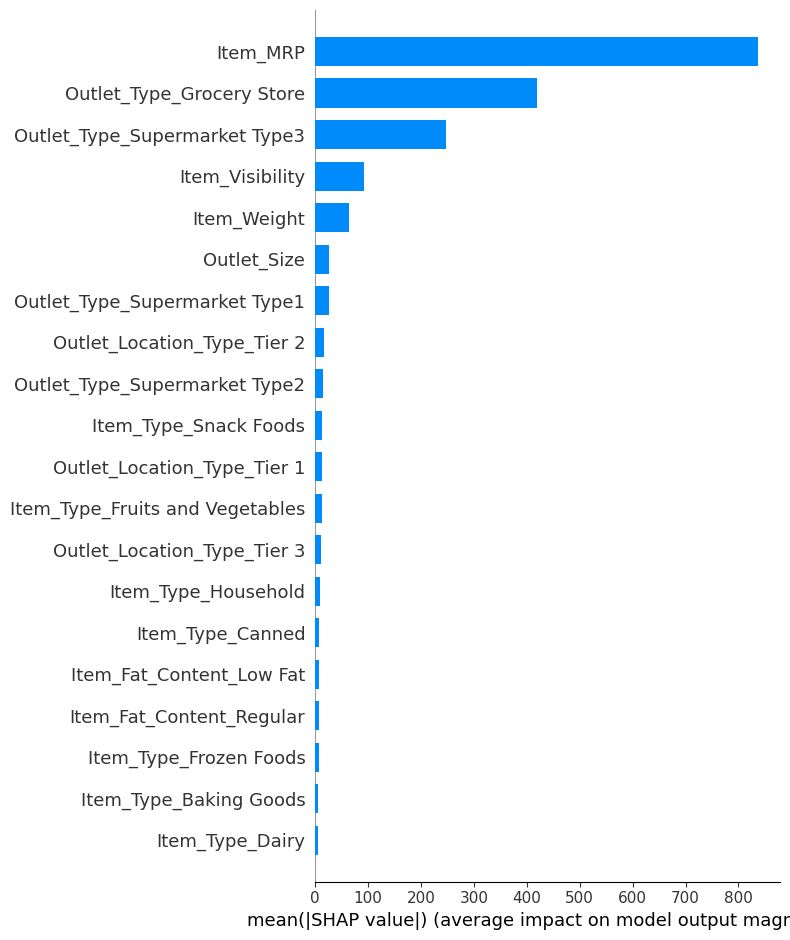

In [ ]:
shap.summary_plot(shap_values,features= X_shap_local, plot_type='bar')

The feature importances of our model:

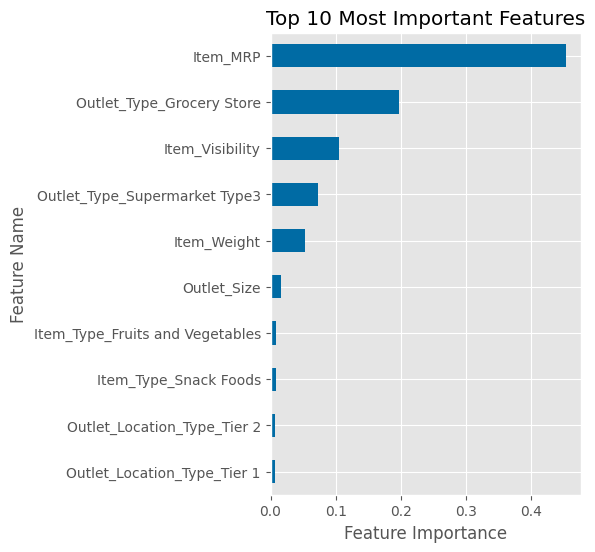




Are they the same features in both? If not, what's different?

The bar plot summary shows the average of the SHAP value for each feature across all samples.
In this case, it is using the magnitude of the average SHAP values to to show which features had the biggest impact on the model's predictions.
Based on the summary plot above, Item_MRP was the most important feature for predicting Item_outlet_sales. Next was outlet_type grocerystore and then outlet_type supermarket type3.

As we can see above, SHAP's importances differ from the built-in model importances from the 3rd most important feature. However, they shared the first and second most important features which are Item_MRP and outlet_type grocerystore.

Like feature importance, this visualization is not indicating which direction the features push the prediction.

Let's remove the plot_type='bar' argument and examine the default plot type that will provide this information.

## summary shap plot - with plot_type='dot:

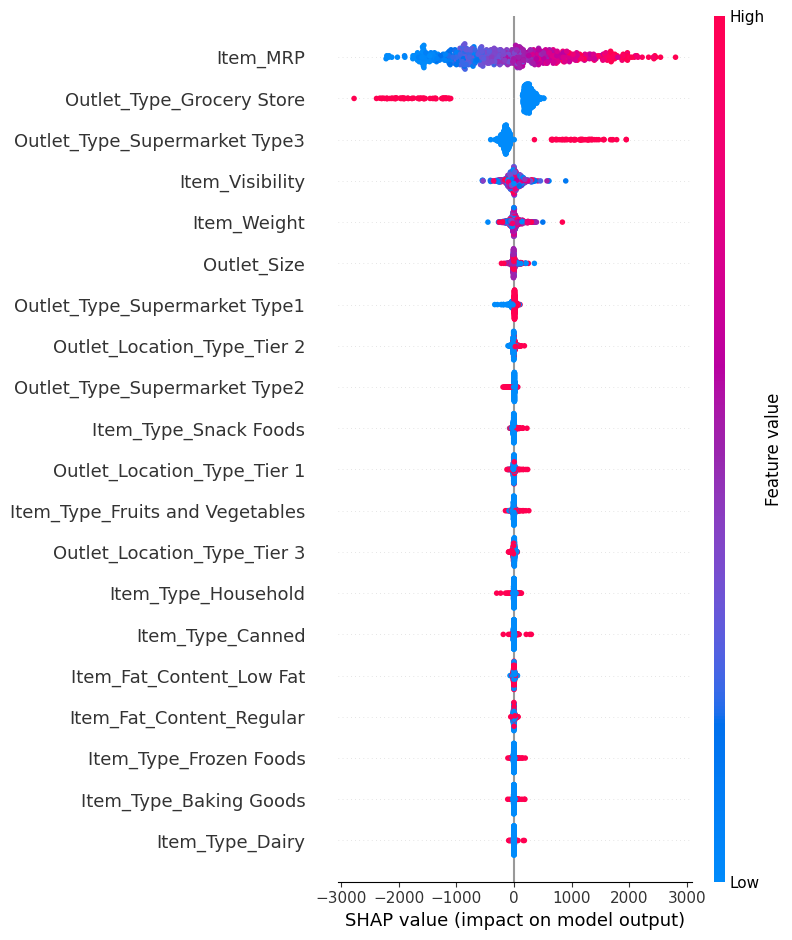

In [ ]:
shap.summary_plot(shap_values,X_shap_local)

Red means the feature value is higher:
- If the red is on the right (positive), higher values of this feature increase the chance the prediction will be higher sales.
- If the red is on the left (negative), higher values of this feature decrease the chances the prediction will be higher sales.


 The top 3 most important features and how they influence your model's predictions:

  - Item_MRP
  - Outlet_type grocery store
  - Outlet_type supermarket type3

A quick glance above shows that Item_MRP and Outlet_type grocery store are both very important, but they have opposite impacts.

According to our model, higher values item_MRP increases the chance of having higher item_outlet_sales, whereas, higher values for Outlet_type grocery store decreases the chance of having higher item_outlet_sales.

In the other hand, higher values for Outlet_type supermarket type3 increases the chance of having higher item_outlet_sales.